In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, load_breast_cancer

np.random.seed(0)

In [2]:
feats, labels = load_digits(return_X_y=True)
feature_names, target_names = load_digits().feature_names, str(load_digits().target_names)

In [3]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [4]:
print(feats.shape)

num_feats = feats.shape[1]

(1797, 64)


In [5]:
k = 5 # k folds parameter
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, cross_validate, learning_curve
X_train, X_test, y_train, y_test = train_test_split(feats, labels, test_size=0.2, random_state=0, stratify=labels)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
def validation_curve_plots(train_scores, test_scores, classifier_type, param_name, param_range, semilog=False):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Validation Curve with " + classifier_type)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    if not semilog:
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if not semilog:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

def cross_validation_describe(scores):
    n_leaves = [estimator.get_n_leaves() for estimator in scores['estimator']]
    depths = [estimator.get_depth() for estimator in scores['estimator']]
    print('Median leaf count: ' + str(np.median(n_leaves)))
    print('Median depth: ' + str(np.median(depths)))
    print('Median train score: ' + str(np.mean(scores['train_score'])))
    print('Mean validation score: ' + str(np.mean(scores['test_score'])))
    print('Delta: ' + str(np.mean(scores['train_score'])-np.mean(scores['test_score'])))
    print('Mean fit time: ' + str(np.mean(scores['fit_time'])))
    print('Mean score time: ' + str(np.mean(scores['score_time'])))
    
def learning_curve_plots(train_sizes, train_scores, valid_scores, classifier_type, semilog=False):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    plt.title("Learning Curve with " + classifier_type)
    plt.xlabel('Training Examples')
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    if not semilog:
        plt.plot(train_sizes, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.semilogx(train_sizes, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if not semilog:
        plt.plot(train_sizes, valid_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.semilogx(train_sizes, valid_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
    
def iteration_curve_plots(train_scores, test_scores, classifier_type, param_name, param_range, semilog=False):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Iterative Training Curve with " + classifier_type)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    if not semilog:
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if not semilog:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    

### Tree

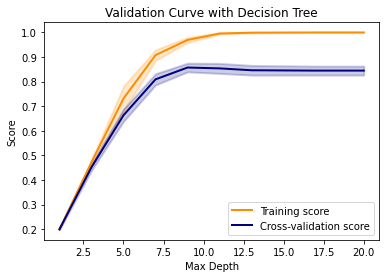

Median leaf count: 44.0
Median depth: 6.0
Median train score: 0.8382048662352897
Mean validation score: 0.7564096980255517
Delta: 0.08179516820973798
Mean fit time: 0.007403373718261719
Mean score time: 0.00032100677490234377

Median leaf count: 59.0
Median depth: 7.0
Median train score: 0.9077939985620767
Mean validation score: 0.8092866821525359
Delta: 0.0985073164095408
Mean fit time: 0.007884931564331055
Mean score time: 0.0002760887145996094

Median leaf count: 73.0
Median depth: 8.0
Median train score: 0.9446765807696673
Mean validation score: 0.8440935927216415
Delta: 0.10058298804802579
Mean fit time: 0.008535385131835938
Mean score time: 0.00027093887329101565


In [7]:
from sklearn import tree
import graphviz
depth_range = np.linspace(1,20,10, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

depth_best = 6
depth_opt_tree = tree.DecisionTreeClassifier(max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)

print()

depth_best = 7
depth_opt_tree = tree.DecisionTreeClassifier(max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)
cross_validation_describe(depth_opt_scores)

print()

depth_best = 8
depth_opt_tree = tree.DecisionTreeClassifier(max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)
    

In [8]:
depth_best = 9
depth_opt_tree = tree.DecisionTreeClassifier(max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)

Median leaf count: 90.0
Median depth: 9.0
Median train score: 0.969554319446021
Mean validation score: 0.8573219125048392
Delta: 0.11223240694118175
Mean fit time: 0.009366941452026368
Mean score time: 0.0003173351287841797


In [9]:
depth_best = 10
depth_opt_tree = tree.DecisionTreeClassifier(max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)

Median leaf count: 108.0
Median depth: 10.0
Median train score: 0.9866041548416392
Mean validation score: 0.8580187766163376
Delta: 0.12858537822530158
Mean fit time: 0.00989217758178711
Mean score time: 0.0003270149230957031


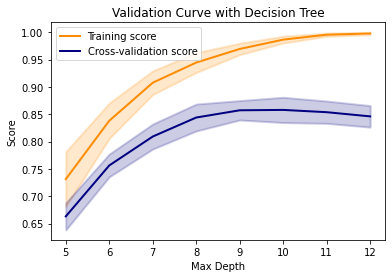

[[0.69097222 0.63194444 0.69337979 0.65505226 0.6445993 ]
 [0.79166667 0.76041667 0.75609756 0.728223   0.7456446 ]
 [0.83680556 0.83680556 0.79094077 0.78397213 0.79790941]
 [0.85416667 0.87152778 0.8466899  0.79790941 0.85017422]
 [0.85416667 0.88888889 0.8466899  0.83623693 0.86062718]
 [0.84722222 0.89583333 0.8466899  0.82926829 0.87108014]
 [0.85416667 0.875      0.82926829 0.83275261 0.87804878]
 [0.83680556 0.87152778 0.83275261 0.82229965 0.86759582]]
[0.66318961 0.7564097  0.80928668 0.84409359 0.85732191 0.85801878
 0.85384727 0.84619628]
[0.02478466 0.02083067 0.02289724 0.0246203  0.01774807 0.02311726
 0.02040766 0.01969564]
Depth 1, Depth 2, Same pop with >95% confidence
5, 6, False
5, 7, False
5, 8, False
5, 9, False
5, 10, False
5, 11, False
5, 12, False
6, 7, False
6, 8, False
6, 9, False
6, 10, False
6, 11, False
6, 12, False
7, 8, True
7, 9, False
7, 10, False
7, 11, False
7, 12, False
8, 9, True
8, 10, True
8, 11, True
8, 12, True
9, 10, True
9, 11, True
9, 12, Tru

In [10]:
from scipy.stats import ttest_ind
depth_range = np.linspace(5,12,8, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

print(valid_scores)
mean_scores = np.mean(valid_scores, axis=1)
print(mean_scores)
std_scores = np.std(valid_scores, axis=1)
print(std_scores)

print('Depth 1, Depth 2, Same pop with >95% confidence')
for i in range(7):
    a = valid_scores[i]
    for j in range(i+1, 8):
        b=valid_scores[j]
        stat, p = ttest_ind(a, b, equal_var=False)
        print(str(i+5)+', ' + str(j+5) + ', ' + str(p>0.05))
        
        

In [11]:
depth_best = 11
depth_opt_tree = tree.DecisionTreeClassifier(max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)

Median leaf count: 119.0
Median depth: 11.0
Median train score: 0.9956508116698831
Mean validation score: 0.8538472706155632
Delta: 0.14180354105431991
Mean fit time: 0.011000967025756836
Mean score time: 0.00036420822143554685


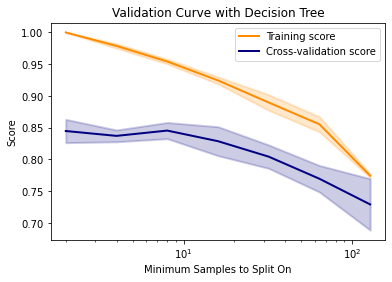

In [12]:
min_samples_split_range = [2, 4, 8, 16, 32, 64, 128]

train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=0), X=X_train, y=y_train, param_name='min_samples_split',
                                              param_range=min_samples_split_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Minimum Samples to Split On', min_samples_split_range, semilog=True)

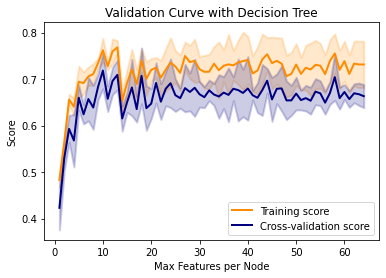

In [13]:
max_features_range=np.linspace(1,64,64, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(max_depth=5, random_state=0), X=X_train, y=y_train, param_name='max_features',
                                              param_range=max_features_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Features per Node', max_features_range)

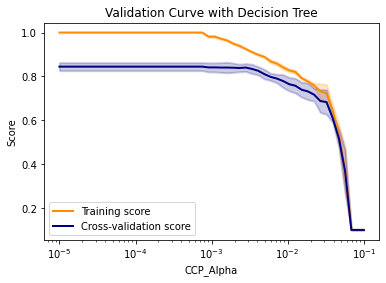

In [14]:
ccp_range = np.logspace(-5, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'CCP_Alpha', ccp_range, semilog=True)

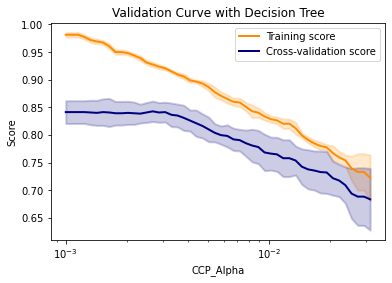

In [15]:
ccp_range = np.logspace(-3, -1.5)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'CCP_Alpha', ccp_range, semilog=True)

In [16]:
ccp_best = [10**-3, 10**-2.75, 10**-2.5,  10**-2.25, 10**-2]
test_scores_list=[]
for ccp in ccp_best:
    print('Complexity param: ' + str(ccp))
    ccp_opt_tree = tree.DecisionTreeClassifier(ccp_alpha=ccp, random_state=0)
    ccp_opt_scores = cross_validate(ccp_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)
    cross_validation_describe(ccp_opt_scores)
    test_scores_list.append(ccp_opt_scores['test_score'])
    print()
    
print('Alpha 1, Alpha 2, Same pop with >95% confidence')
for i in range(4):
    a = test_scores_list[i]
    for j in range(i+1, 5):
        b=test_scores_list[j]
        stat, p = ttest_ind(a, b, equal_var=False)
        print(str(ccp_best[i])+', ' + str(ccp_best[j]) + ', ' + str(p>0.05))


Complexity param: 0.001
Median leaf count: 99.0
Median depth: 12.0
Median train score: 0.9813846444923751
Mean validation score: 0.8413182346109176
Delta: 0.14006640988145747
Mean fit time: 0.02013235092163086
Mean score time: 0.0006231784820556641

Complexity param: 0.0017782794100389228
Median leaf count: 66.0
Median depth: 11.0
Median train score: 0.9500697014417074
Mean validation score: 0.8392276422764228
Delta: 0.11084205916528467
Mean fit time: 0.020038938522338866
Mean score time: 0.0005365371704101563

Complexity param: 0.0031622776601683794
Median leaf count: 46.0
Median depth: 10.0
Median train score: 0.9185803912665078
Mean validation score: 0.8406141114982578
Delta: 0.07796627976824999
Mean fit time: 0.019882583618164064
Mean score time: 0.0006550312042236328

Complexity param: 0.005623413251903491
Median leaf count: 29.0
Median depth: 8.0
Median train score: 0.8736931168880313
Mean validation score: 0.8002613240418117
Delta: 0.07343179284621959
Mean fit time: 0.0129244804

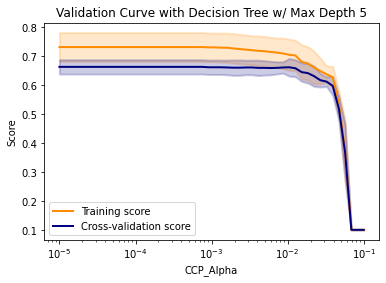

In [17]:
ccp_range = np.logspace(-5, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(max_depth=5, random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree w/ Max Depth 5', 'CCP_Alpha', ccp_range, semilog=True)

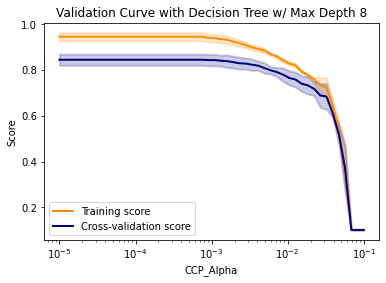

In [18]:
ccp_range = np.logspace(-5, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(max_depth=8, random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree w/ Max Depth 8', 'CCP_Alpha', ccp_range, semilog=True)

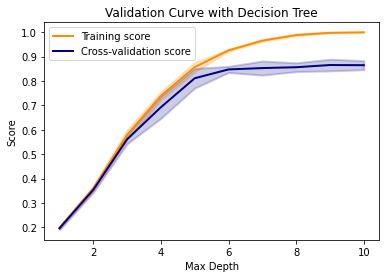

In [19]:
depth_range = np.linspace(1,10,10)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(criterion='entropy', random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

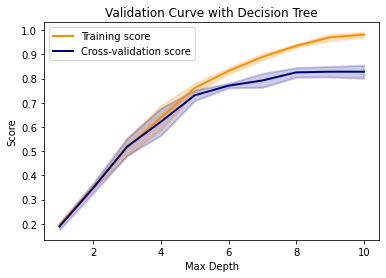

In [20]:
depth_range = np.linspace(1,10,10)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(splitter='random', random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

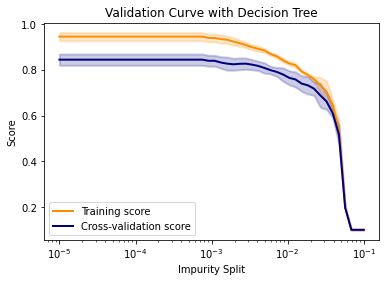

In [21]:
min_inpurity_decrease_range = np.logspace(-5,-1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(max_depth=8, random_state=0), X=X_train, y=y_train, param_name='min_impurity_decrease',
                                              param_range=min_inpurity_decrease_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Impurity Split', min_inpurity_decrease_range, semilog=True)

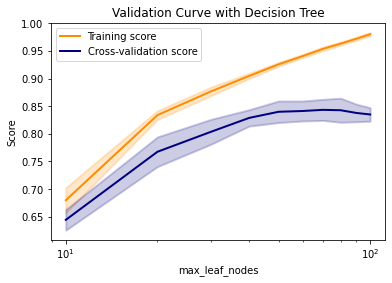

In [22]:
node_range = np.linspace(10,100,10, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=0), X=X_train, y=y_train, param_name='max_leaf_nodes',
                                              param_range=node_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'max_leaf_nodes', node_range, semilog=True)

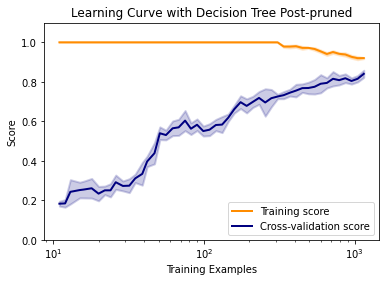

In [23]:
train_samples = np.logspace(-2, 0)*len(y_train) * 0.8
train_samples = train_samples.astype(int)

train_sizes, train_scores, valid_scores = learning_curve(tree.DecisionTreeClassifier(ccp_alpha=10**-2.5, random_state=0), X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Decision Tree Post-pruned', semilog=True)

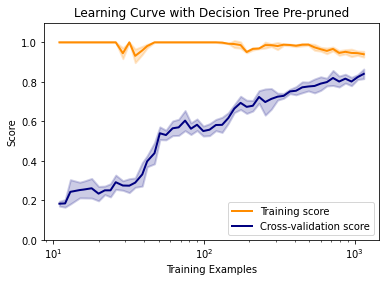

In [24]:
train_sizes, train_scores, valid_scores = learning_curve(tree.DecisionTreeClassifier(max_depth=8, random_state=0), X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Decision Tree Pre-pruned', semilog=True)

In [25]:
import time
final_tree = tree.DecisionTreeClassifier(ccp_alpha=10**-2.5, random_state=0)
final_tree.fit(X_train, y_train)
print(final_tree.score(X_test, y_test))

n_iters = 100

start = time.time()
for i in range(n_iters):
    final_tree.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_tree.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))

0.8444444444444444
fit time: 0.023768019676208497
inference time: 0.0006113696098327637


### NN

In [26]:
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasClassifier

early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)

In [27]:
def create_network(num_neurons = 16, second_layer=True, lr=0.01):
    network = models.Sequential()
    network.add(layers.Dense(units=num_neurons, activation='relu', input_shape=(num_feats,)))
    if second_layer:
        network.add(layers.Dense(units=num_neurons, activation='relu'))
    network.add(layers.Dense(units=10, activation='softmax'))
    network.compile(loss='categorical_crossentropy', # Cross-entropy
                        optimizer=optimizers.SGD(learning_rate=lr), # Root Mean Square Propagation
                        metrics=['accuracy']) # Accuracy performance metric
    return network

def create_single_layer_network(lr=0.01):
    network = models.Sequential()
    network.add(layers.Dense(units=10, activation='softmax', input_shape=(num_feats,)))
    network.compile(loss='categorical_crossentropy', # Cross-entropy
                        optimizer=optimizers.SGD(learning_rate=lr), # Root Mean Square Propagation
                        metrics=['accuracy']) # Accuracy performance metric
    return network



In [28]:
neural_network = KerasClassifier(build_fn=create_network, epochs=50, batch_size=64, verbose=0, num_neurons=16, second_layer=True)

In [29]:
neural_network.get_params().keys()

dict_keys(['epochs', 'batch_size', 'verbose', 'num_neurons', 'second_layer', 'build_fn'])

In [30]:
cross_val_score(neural_network, X_train, y_train, cv=5)

2021-09-26 11:25:30.973591: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 11:25:30.973775: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-26 11:25:30.974843: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-26 11:25:31.040134: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 11:25:31.060095: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


array([0.875     , 0.8611111 , 0.85017419, 0.90940768, 0.85714287])

In [31]:
single_layer_neural_network = KerasClassifier(build_fn=create_single_layer_network, epochs=20, batch_size=64, verbose=0)

In [32]:
cross_val_score(single_layer_neural_network, X_train, y_train, cv=5)

array([0.86805558, 0.83333331, 0.86062717, 0.86062717, 0.86411148])

In [33]:
neural_network.get_params().keys()

dict_keys(['epochs', 'batch_size', 'verbose', 'num_neurons', 'second_layer', 'build_fn'])

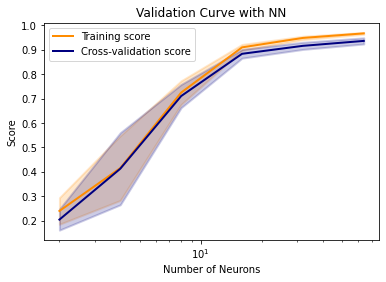

In [34]:
neuron_range=[2, 4, 8, 16, 32, 64]
train_scores, valid_scores = validation_curve(estimator=neural_network, X=X_train, y=y_train, param_name='num_neurons',
                                              param_range=neuron_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'NN', 'Number of Neurons', neuron_range, semilog=True)

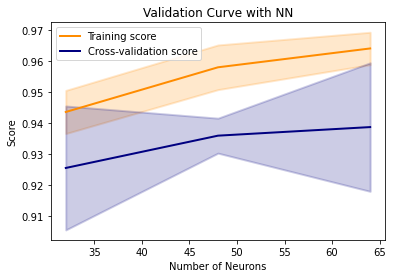

In [35]:
neuron_range=[32, 48, 64]
train_scores, valid_scores = validation_curve(estimator=neural_network, X=X_train, y=y_train, param_name='num_neurons',
                                              param_range=neuron_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'NN', 'Number of Neurons', neuron_range)

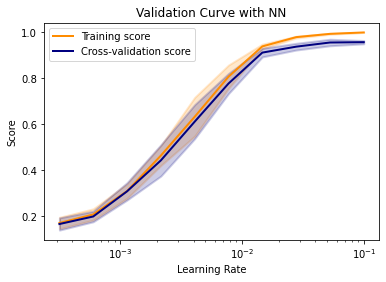

In [36]:
lr_range = np.logspace(-3.5,-1, 10)
train_scores, valid_scores = validation_curve(estimator=neural_network, X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'NN', 'Learning Rate', lr_range, semilog=True)

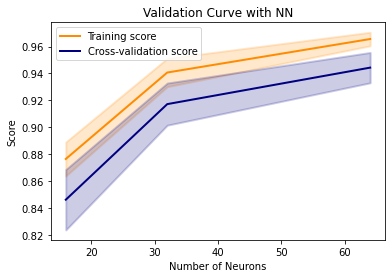

In [37]:
neuron_range=[16, 32, 64]
train_scores, valid_scores = validation_curve(estimator=neural_network, X=X_train, y=y_train, param_name='num_neurons',
                                              param_range=neuron_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'NN', 'Number of Neurons', neuron_range)

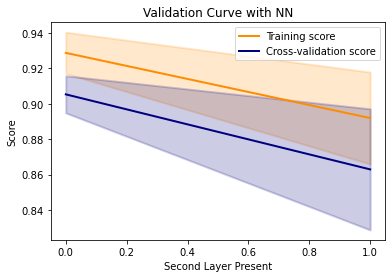

In [38]:
second_layer_range = [False, True]
train_scores, valid_scores = validation_curve(estimator=neural_network, X=X_train, y=y_train, param_name='second_layer',
                                              param_range=second_layer_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'NN', 'Second Layer Present', second_layer_range)

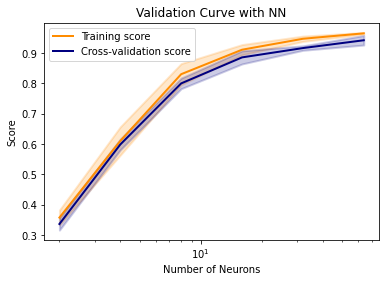

In [39]:
neuron_range=[2, 4, 8, 16, 32, 64]
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_network, epochs=50, batch_size=64, verbose=0, second_layer=False), X=X_train, y=y_train, param_name='num_neurons',
                                              param_range=neuron_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'NN', 'Number of Neurons', neuron_range, semilog=True)

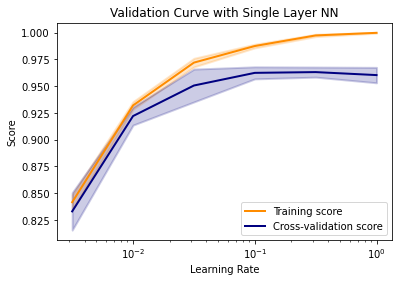

In [40]:
lr_range=np.logspace(-2.5,0,6)
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0), X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'Single Layer NN', 'Learning Rate', lr_range, semilog=True)

In [41]:
name_list = ['Single 10^-2.5', 'Single 10^-2', 'Single 10^-1.5', 'Single 10^-1', 'Single 10^-0.5', 'Single 10^0']
valid_list = []
for i in range(6):
    valid_list.append(valid_scores[i, :])
print(valid_list)
print(np.mean(valid_scores, axis=1))

[array([0.84722221, 0.84375   , 0.80836236, 0.85017419, 0.81533098]), array([0.9236111 , 0.92708331, 0.90592337, 0.93031359, 0.92334497]), array([0.94444442, 0.96527779, 0.92334497, 0.96167248, 0.95818818]), array([0.96875   , 0.96875   , 0.95470381, 0.95818818, 0.96167248]), array([0.9548611 , 0.96875   , 0.96167248, 0.96515679, 0.96515679]), array([0.96180558, 0.97222221, 0.9512195 , 0.96167248, 0.95470381])]
[0.83296795 0.92205527 0.95058557 0.96241289 0.96311944 0.96032472]


In [42]:
print(valid_scores)
print(np.mean(valid_scores, axis=1))

[[0.84722221 0.84375    0.80836236 0.85017419 0.81533098]
 [0.9236111  0.92708331 0.90592337 0.93031359 0.92334497]
 [0.94444442 0.96527779 0.92334497 0.96167248 0.95818818]
 [0.96875    0.96875    0.95470381 0.95818818 0.96167248]
 [0.9548611  0.96875    0.96167248 0.96515679 0.96515679]
 [0.96180558 0.97222221 0.9512195  0.96167248 0.95470381]]
[0.83296795 0.92205527 0.95058557 0.96241289 0.96311944 0.96032472]


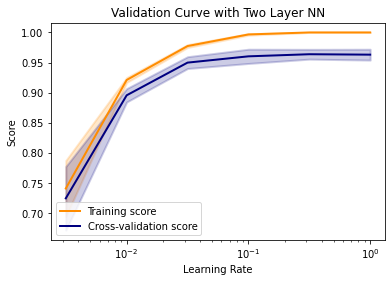

[[0.73958331 0.65972221 0.66550523 0.78745645 0.77003485]
 [0.90625    0.90277779 0.87456447 0.89547038 0.89895469]
 [0.9548611  0.96180558 0.9337979  0.94425088 0.95470381]
 [0.97569442 0.96875    0.94076657 0.95818818 0.95818818]
 [0.95833331 0.97222221 0.9512195  0.97212541 0.96515679]
 [0.96875    0.96875    0.94773519 0.97212541 0.95818818]]
[0.72446041 0.89560347 0.94988385 0.96031747 0.96381145 0.96310976]


In [43]:
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_network, epochs=50, batch_size=64, verbose=0, second_layer=False), X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'Two Layer NN', 'Learning Rate', lr_range, semilog=True)
print(valid_scores)
print(np.mean(valid_scores, axis=1))

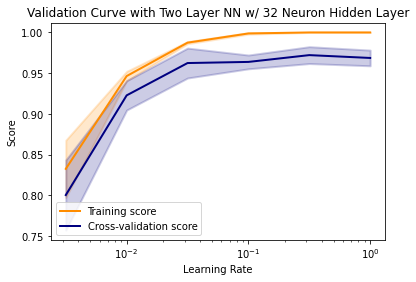

[[0.83333331 0.75347221 0.83972126 0.83275259 0.74216026]
 [0.94097221 0.94444442 0.89547038 0.91637629 0.91637629]
 [0.96875    0.96875    0.93031359 0.98606271 0.95818818]
 [0.97222221 0.96875    0.94773519 0.96515679 0.96515679]
 [0.97569442 0.9861111  0.95470381 0.97560978 0.9686411 ]
 [0.97569442 0.9826389  0.95470381 0.96515679 0.96515679]]
[0.80028793 0.92272792 0.96241289 0.9638042  0.97215204 0.96867014]


In [44]:
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_network, epochs=50, batch_size=64, verbose=0, second_layer=False, num_neurons=32), X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'Two Layer NN w/ 32 Neuron Hidden Layer', 'Learning Rate', lr_range, semilog=True)
print(valid_scores)
print(np.mean(valid_scores, axis=1))

In [45]:
name_list.extend(['Dual 10^-2.5', 'Dual 10^-2', 'Dual 10^-1.5', 'Dual 10^-1', 'Dual 10^-0.5', 'Dual 10^0'])
for i in range(6):
    valid_list.append(valid_scores[i, :])
print(valid_list)
print(np.mean(valid_scores, axis=1))

[array([0.84722221, 0.84375   , 0.80836236, 0.85017419, 0.81533098]), array([0.9236111 , 0.92708331, 0.90592337, 0.93031359, 0.92334497]), array([0.94444442, 0.96527779, 0.92334497, 0.96167248, 0.95818818]), array([0.96875   , 0.96875   , 0.95470381, 0.95818818, 0.96167248]), array([0.9548611 , 0.96875   , 0.96167248, 0.96515679, 0.96515679]), array([0.96180558, 0.97222221, 0.9512195 , 0.96167248, 0.95470381]), array([0.83333331, 0.75347221, 0.83972126, 0.83275259, 0.74216026]), array([0.94097221, 0.94444442, 0.89547038, 0.91637629, 0.91637629]), array([0.96875   , 0.96875   , 0.93031359, 0.98606271, 0.95818818]), array([0.97222221, 0.96875   , 0.94773519, 0.96515679, 0.96515679]), array([0.97569442, 0.9861111 , 0.95470381, 0.97560978, 0.9686411 ]), array([0.97569442, 0.9826389 , 0.95470381, 0.96515679, 0.96515679])]
[0.80028793 0.92272792 0.96241289 0.9638042  0.97215204 0.96867014]


In [46]:
print('Network 1, Network 2, Same pop with >95% confidence')
print(name_list)
for i in range(len(valid_list)-1):
    a = valid_list[i]
    for j in range(i+1, len(valid_list)):
        b=valid_list[j]
        stat, p = ttest_ind(a, b, equal_var=False)
        print(name_list[i]+', ' + name_list[j] + ', ' + str(p>0.05))


Network 1, Network 2, Same pop with >95% confidence
['Single 10^-2.5', 'Single 10^-2', 'Single 10^-1.5', 'Single 10^-1', 'Single 10^-0.5', 'Single 10^0', 'Dual 10^-2.5', 'Dual 10^-2', 'Dual 10^-1.5', 'Dual 10^-1', 'Dual 10^-0.5', 'Dual 10^0']
Single 10^-2.5, Single 10^-2, False
Single 10^-2.5, Single 10^-1.5, False
Single 10^-2.5, Single 10^-1, False
Single 10^-2.5, Single 10^-0.5, False
Single 10^-2.5, Single 10^0, False
Single 10^-2.5, Dual 10^-2.5, True
Single 10^-2.5, Dual 10^-2, False
Single 10^-2.5, Dual 10^-1.5, False
Single 10^-2.5, Dual 10^-1, False
Single 10^-2.5, Dual 10^-0.5, False
Single 10^-2.5, Dual 10^0, False
Single 10^-2, Single 10^-1.5, False
Single 10^-2, Single 10^-1, False
Single 10^-2, Single 10^-0.5, False
Single 10^-2, Single 10^0, False
Single 10^-2, Dual 10^-2.5, False
Single 10^-2, Dual 10^-2, True
Single 10^-2, Dual 10^-1.5, False
Single 10^-2, Dual 10^-1, False
Single 10^-2, Dual 10^-0.5, False
Single 10^-2, Dual 10^0, False
Single 10^-1.5, Single 10^-1, T

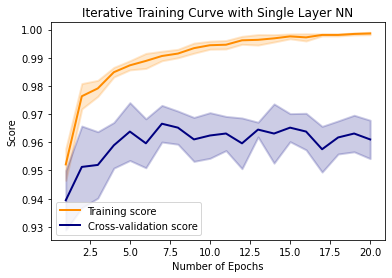

In [47]:
epochs_range=np.linspace(1,20,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_single_layer_network, epochs=20, batch_size=64, verbose=0, lr=1), X=X_train, y=y_train, param_name='epochs',
                                              param_range=epochs_range, cv=5)
iteration_curve_plots(train_scores, valid_scores, 'Single Layer NN', 'Number of Epochs', epochs_range)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py", line 1100, i

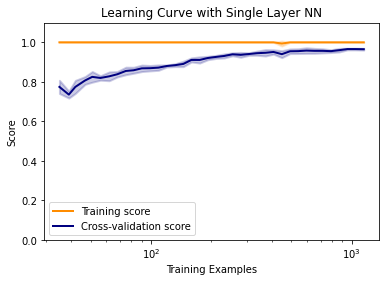

In [48]:
train_samples = np.logspace(-2, 0)*len(y_train) * 0.8
train_samples = train_samples.astype(int)

train_sizes, train_scores, valid_scores = learning_curve(KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0, lr = 1) , X_train, y_train, train_sizes=train_samples, cv=5, fit_params={'callbacks':early_stopping})
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Single Layer NN', semilog=True)

In [49]:
final_clf_nn = KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0, lr = 1)
final_clf_nn.fit(X_train, y_train, callbacks=early_stopping)
score = final_clf_nn.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_clf_nn.fit(X_train, y_train, callbacks=early_stopping)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_clf_nn.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))


0.9583333134651184
fit time: 2.2372329878807067
inference time: 0.198056161403656


### Boosted Trees

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
classfier = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(ccp_alpha=10**-1.5), n_estimators=100)
scores = cross_val_score(classfier, X_train, y_train, cv=5)


In [52]:
scores.mean()

0.9512751645373596

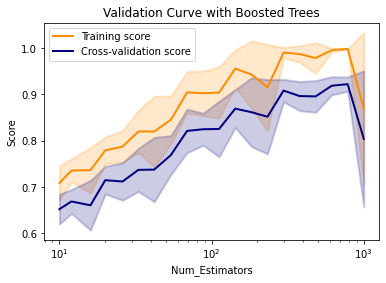

In [53]:
estimators_range=np.logspace(1,3,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3)), X=X_train, y=y_train, param_name='n_estimators',
                                              param_range=estimators_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Num_Estimators', estimators_range, semilog=True)

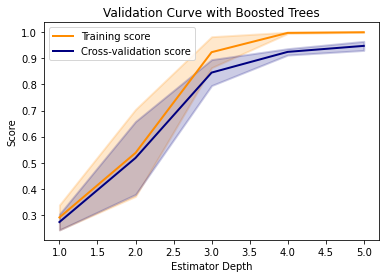

In [54]:
tree_depth_range=[1,2,3,4,5]
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=100, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__max_depth',
                                              param_range=tree_depth_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Estimator Depth', tree_depth_range)

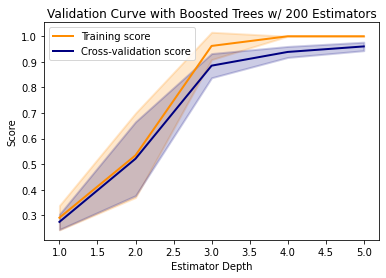

In [55]:
tree_depth_range=[1,2,3,4,5]
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=200, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__max_depth',
                                              param_range=tree_depth_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees w/ 200 Estimators', 'Estimator Depth', tree_depth_range)

In [56]:
classfier.get_params().keys()

dict_keys(['algorithm', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

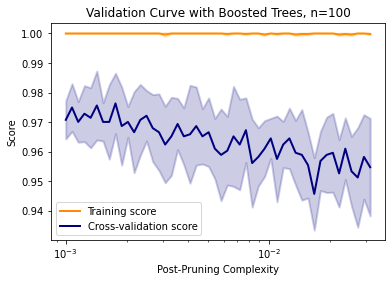

In [57]:
cca_range=np.logspace(-3,-1.5)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=100, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees, n=100', 'Post-Pruning Complexity', cca_range, semilog=True)

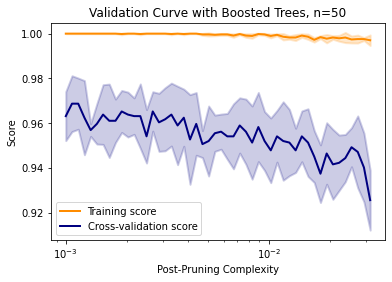

In [58]:
cca_range=np.logspace(-3,-1.5)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=50, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees, n=50', 'Post-Pruning Complexity', cca_range, semilog=True)

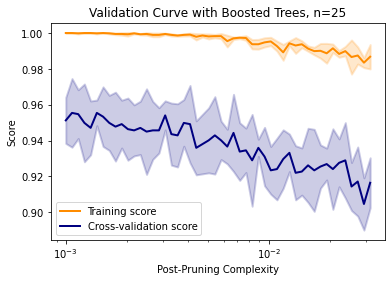

In [59]:
cca_range=np.logspace(-3,-1.5)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=25, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees, n=25', 'Post-Pruning Complexity', cca_range, semilog=True)

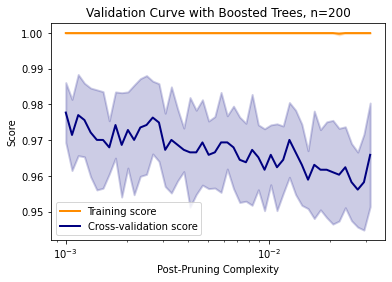

In [60]:
cca_range=np.logspace(-3,-1.5)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=200, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees, n=200', 'Post-Pruning Complexity', cca_range, semilog=True)

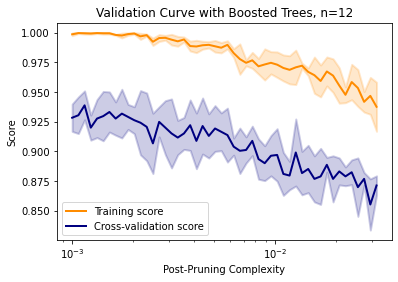

In [61]:
cca_range=np.logspace(-3,-1.5)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=12, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees, n=12', 'Post-Pruning Complexity', cca_range, semilog=True)

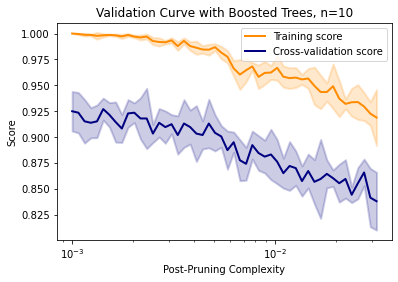

In [62]:
cca_range=np.logspace(-3,-1.5)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=10, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees, n=10', 'Post-Pruning Complexity', cca_range, semilog=True)

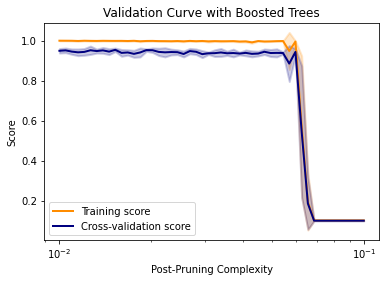

In [63]:
cca_range=np.logspace(-2,-1)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=50, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Post-Pruning Complexity', cca_range, semilog=True)

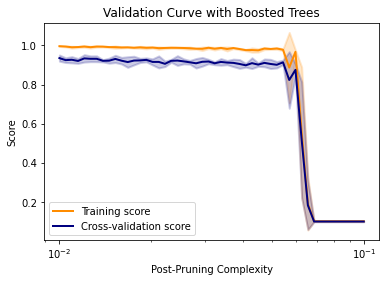

In [64]:
cca_range=np.logspace(-2,-1)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=24, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Post-Pruning Complexity', cca_range, semilog=True)

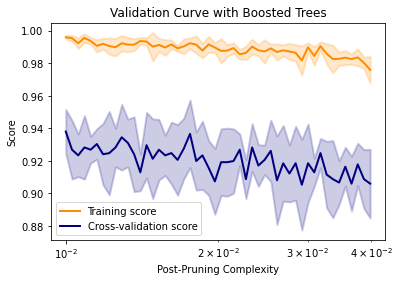

In [65]:
cca_range=np.logspace(-2,-1.4)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=24, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Post-Pruning Complexity', cca_range, semilog=True)

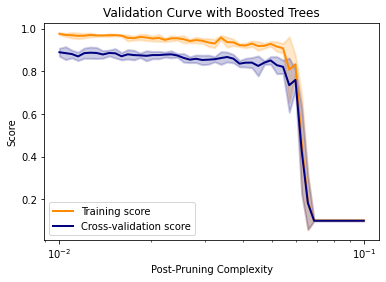

In [66]:
cca_range=np.logspace(-2,-1)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(n_estimators=12, base_estimator=tree.DecisionTreeClassifier()), X=X_train, y=y_train, param_name='base_estimator__ccp_alpha',
                                              param_range=cca_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Post-Pruning Complexity', cca_range, semilog=True)

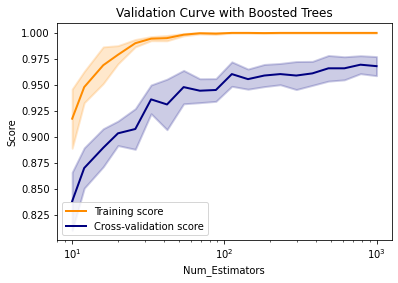

In [67]:
estimators_range=np.logspace(1,3,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(ccp_alpha=10**-1.5)), X=X_train, y=y_train, param_name='n_estimators',
                                              param_range=estimators_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Num_Estimators', estimators_range, semilog=True)

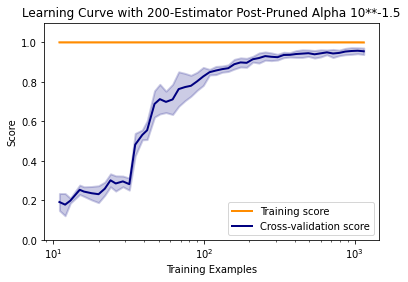

In [68]:
train_sizes, train_scores, valid_scores = learning_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(ccp_alpha=10**-1.5), n_estimators=200) , X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, '200-Estimator Post-Pruned Alpha 10**-1.5', semilog=True)

In [69]:
final_boost_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(ccp_alpha=10**-1.5), n_estimators=200)
final_boost_clf.fit(X_train, y_train)
score = final_boost_clf.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_boost_clf.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_boost_clf.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))

0.9583333333333334
fit time: 2.9999403047561644
inference time: 0.042243163585662845


### Support Vector Machines

In [70]:
from sklearn import svm

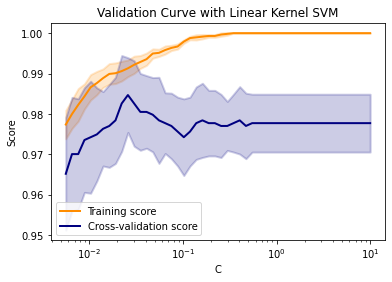

In [71]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-2.25,1)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(kernel='linear'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Linear Kernel SVM', 'C', C_range, semilog=True)

In [72]:
print(C_range)
print(np.mean(valid_scores, axis=1))

c_max = C_range[np.argmax(np.mean(valid_scores, axis=1))]

print(np.max(np.mean(valid_scores, axis=1)))

[5.62341325e-03 6.55128557e-03 7.63225832e-03 8.89159334e-03
 1.03587207e-02 1.20679264e-02 1.40591539e-02 1.63789371e-02
 1.90814883e-02 2.22299648e-02 2.58979451e-02 3.01711481e-02
 3.51494365e-02 4.09491506e-02 4.77058270e-02 5.55773659e-02
 6.47477215e-02 7.54312006e-02 8.78774712e-02 1.02377397e-01
 1.19269833e-01 1.38949549e-01 1.61876451e-01 1.88586328e-01
 2.19703378e-01 2.55954792e-01 2.98187749e-01 3.47389211e-01
 4.04708995e-01 4.71486636e-01 5.49282697e-01 6.39915234e-01
 7.45502286e-01 8.68511374e-01 1.01181716e+00 1.17876863e+00
 1.37326737e+00 1.59985872e+00 1.86383801e+00 2.17137430e+00
 2.52965459e+00 2.94705170e+00 3.43332002e+00 3.99982340e+00
 4.65980075e+00 5.42867544e+00 6.32441570e+00 7.36795456e+00
 8.58367902e+00 1.00000000e+01]
[0.96519551 0.97007114 0.97006872 0.97355062 0.97424506 0.97494193
 0.97633324 0.9770301  0.97841899 0.98259533 0.98468351 0.98259533
 0.98050958 0.98050716 0.97981272 0.97841899 0.97772696 0.97703252
 0.97564121 0.9742499  0.97564121 0

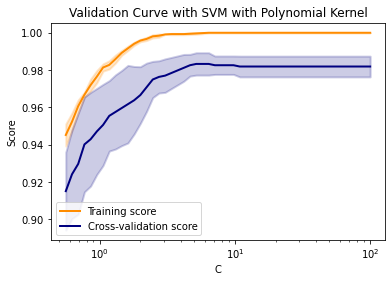

In [73]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-0.25,2)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(kernel='poly'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'SVM with Polynomial Kernel', 'C', C_range, semilog=True)

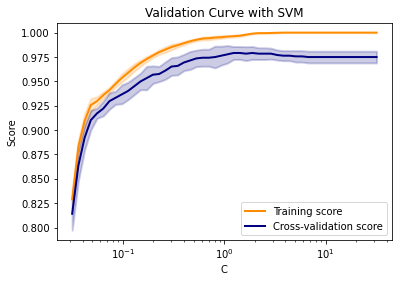

In [74]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-1.5,1.5)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(kernel='rbf'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'SVM', 'C', C_range, semilog=True)

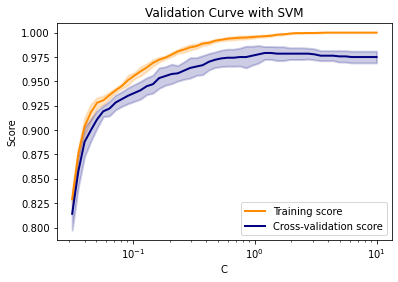

In [75]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-1.5,1)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(kernel='rbf'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'SVM', 'C', C_range, semilog=True)

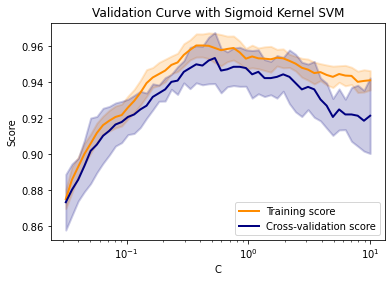

In [76]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-1.5,1)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(kernel='sigmoid'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Sigmoid Kernel SVM', 'C', C_range, semilog=True)

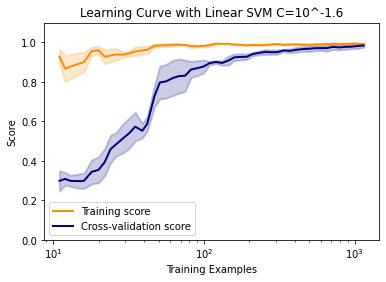

In [77]:
train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C=c_max) , X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Linear SVM C=10^-1.6', semilog=True)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=4).  Cons

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=33).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=34).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=35).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=36).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=13).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=16).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=47).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=48).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=49).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=28).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=29).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=31).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=16).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=17).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=47).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=48).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=49).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=28).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=29).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=31).  

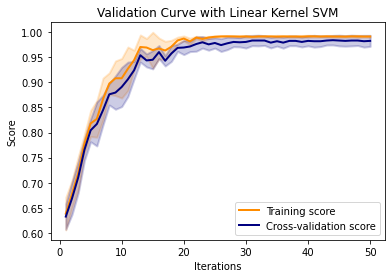

In [78]:
max_iter_range = np.linspace(1,50,50)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(kernel='linear', C=c_max), X=X_train, y=y_train, param_name='max_iter',
                                              param_range=max_iter_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Linear Kernel SVM', 'Iterations', max_iter_range)

In [79]:
final_svm_clf = svm.SVC(kernel='linear', C=c_max)
final_svm_clf.fit(X_train, y_train)
score = final_svm_clf.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_svm_clf.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_svm_clf.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))

0.9833333333333333
fit time: 0.022572135925292967
inference time: 0.006835813522338867


### KNN

In [80]:
from sklearn import neighbors

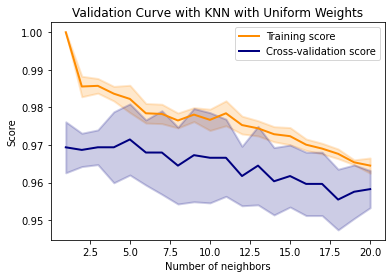

In [81]:
n_neighbors = np.linspace(1,20,20, dtype=int)

train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(weights='uniform'), X=X_train, y=y_train, param_name='n_neighbors',
                                              param_range=n_neighbors, cv=5)

validation_curve_plots(train_scores, valid_scores, 'KNN with Uniform Weights', 'Number of neighbors', n_neighbors)

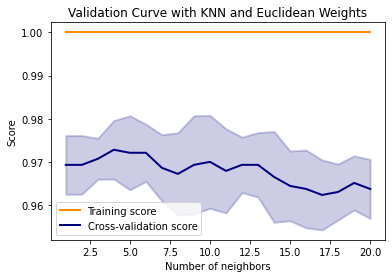

In [82]:
n_neighbors = np.linspace(1,20,20, dtype=int)

train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(weights='distance'), X=X_train, y=y_train, param_name='n_neighbors',
                                              param_range=n_neighbors, cv=5)

validation_curve_plots(train_scores, valid_scores, 'KNN and Euclidean Weights', 'Number of neighbors', n_neighbors)

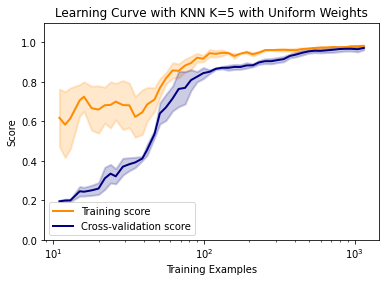

In [83]:
train_sizes, train_scores, valid_scores = learning_curve(neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform') , X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'KNN K=5 with Uniform Weights', semilog=True)

In [84]:
final_knn_clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
final_knn_clf.fit(X_train, y_train)
score = final_knn_clf.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_knn_clf.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_knn_clf.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))

0.9805555555555555
fit time: 0.00028065919876098635
inference time: 0.01873589277267456
